In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [4]:
df.columns = df.columns.str.replace(' ', '_')

In [5]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.nunique()

fixed_acidity            96
volatile_acidity        143
citric_acid              80
residual_sugar           91
chlorides               153
free_sulfur_dioxide      60
total_sulfur_dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [11]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

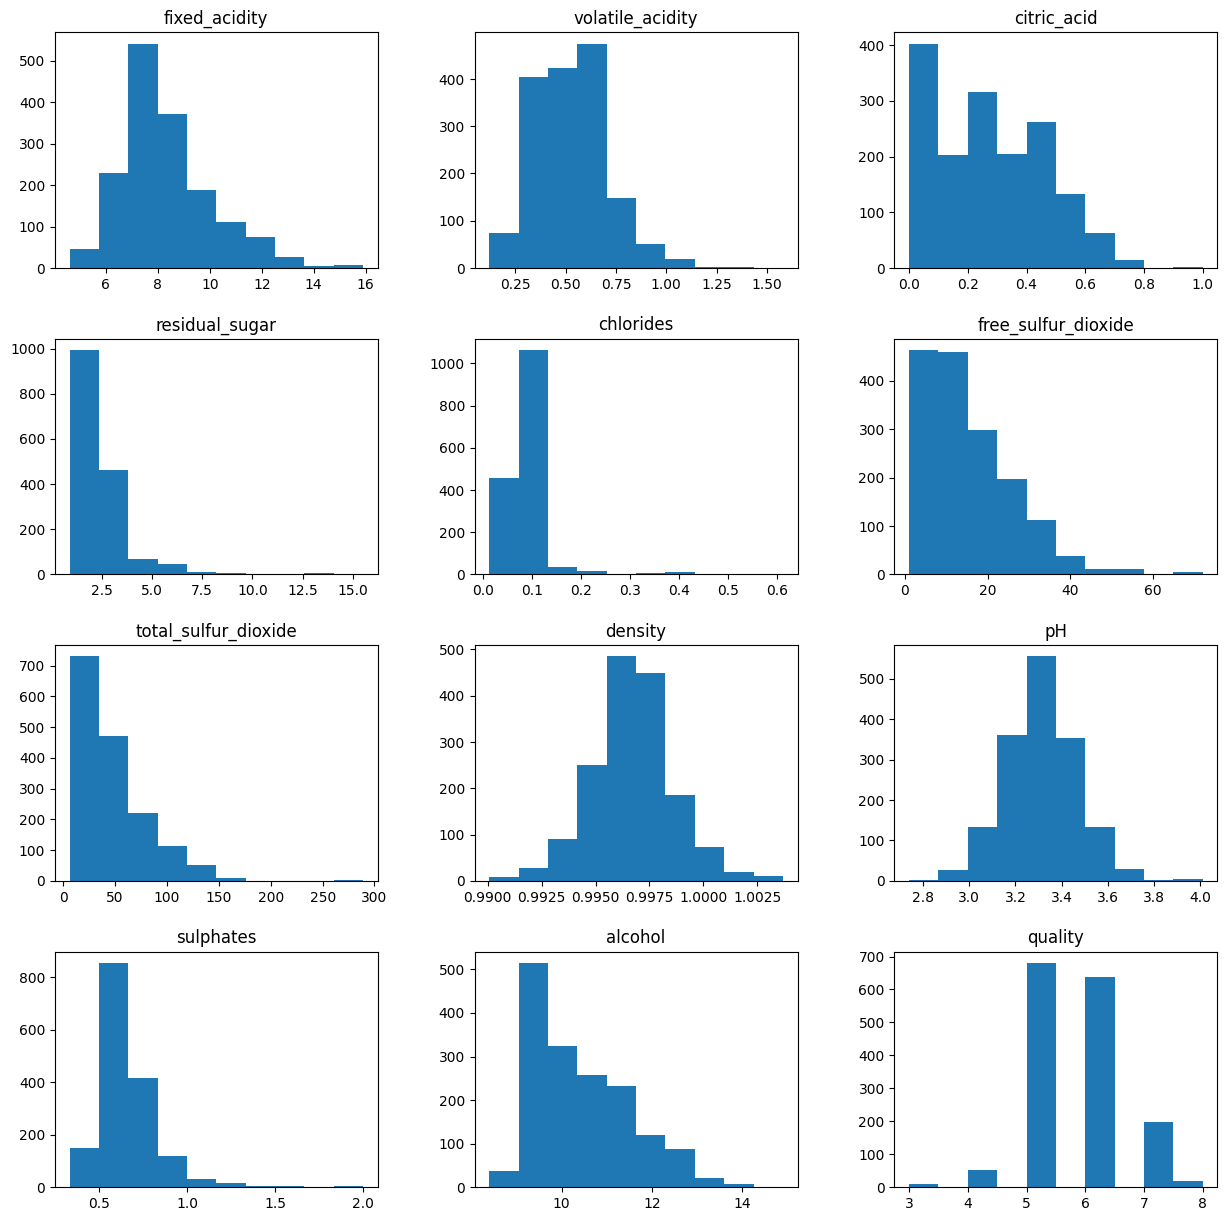

In [12]:
df.hist(figsize=(15, 15), grid=False)
plt.show()

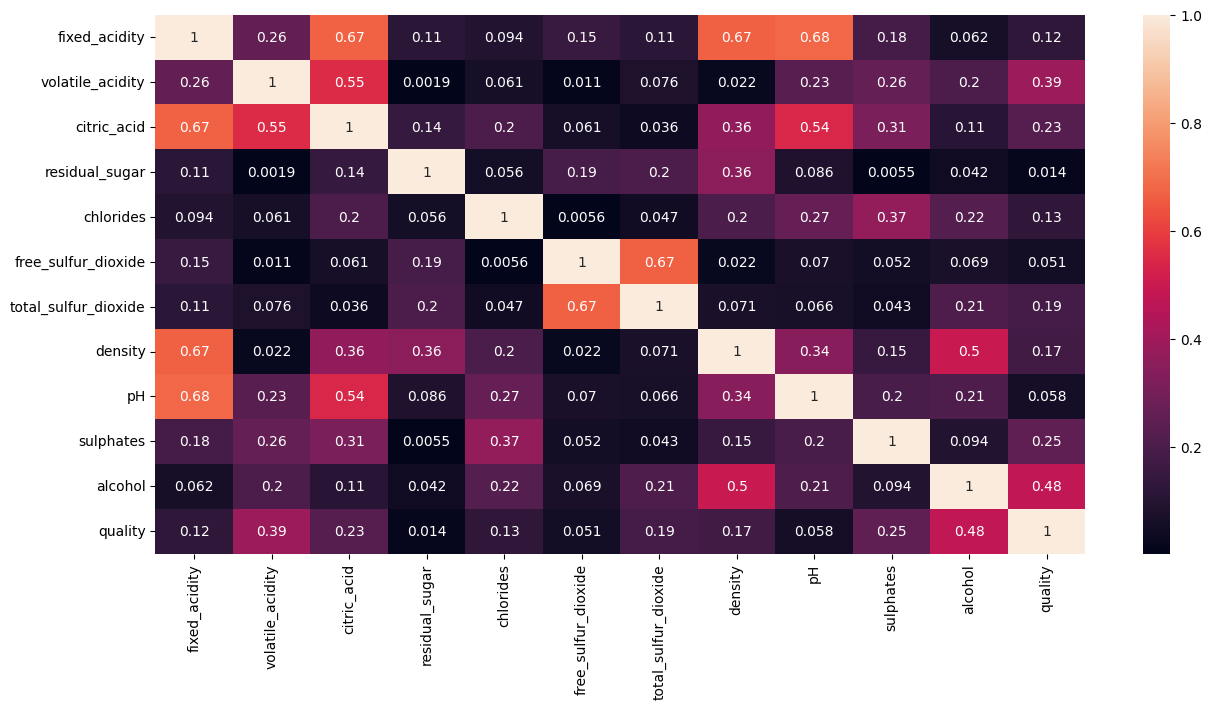

In [13]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr().abs(), annot=True)
plt.show()

**Regression**

In [14]:
X = df.iloc[:, :11]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=15)

Linear regression

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
y_pred = np.round(y_pred)

print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'MAE = {mean_absolute_error(y_test, y_pred)}')

MSE = 0.50625
MAE = 0.43125


SVM regression (SVR)

In [16]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_test)
y_pred = np.round(y_pred)

print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'MAE = {mean_absolute_error(y_test, y_pred)}')

MSE = 0.525
MAE = 0.44583333333333336


Линейная регрессия и SVM показали схожие результаты. Чуть лучше получились ошибки у Линейной регрессии.

**Classification**

In [17]:
df_cl = df.copy()

In [18]:
df_cl.loc[df['quality'] >= 6, 'quality'] = 1    # good wine
df_cl.loc[df['quality'] < 6, 'quality'] = 0     # bad wine

In [19]:
df_cl.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [20]:
df_cl['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

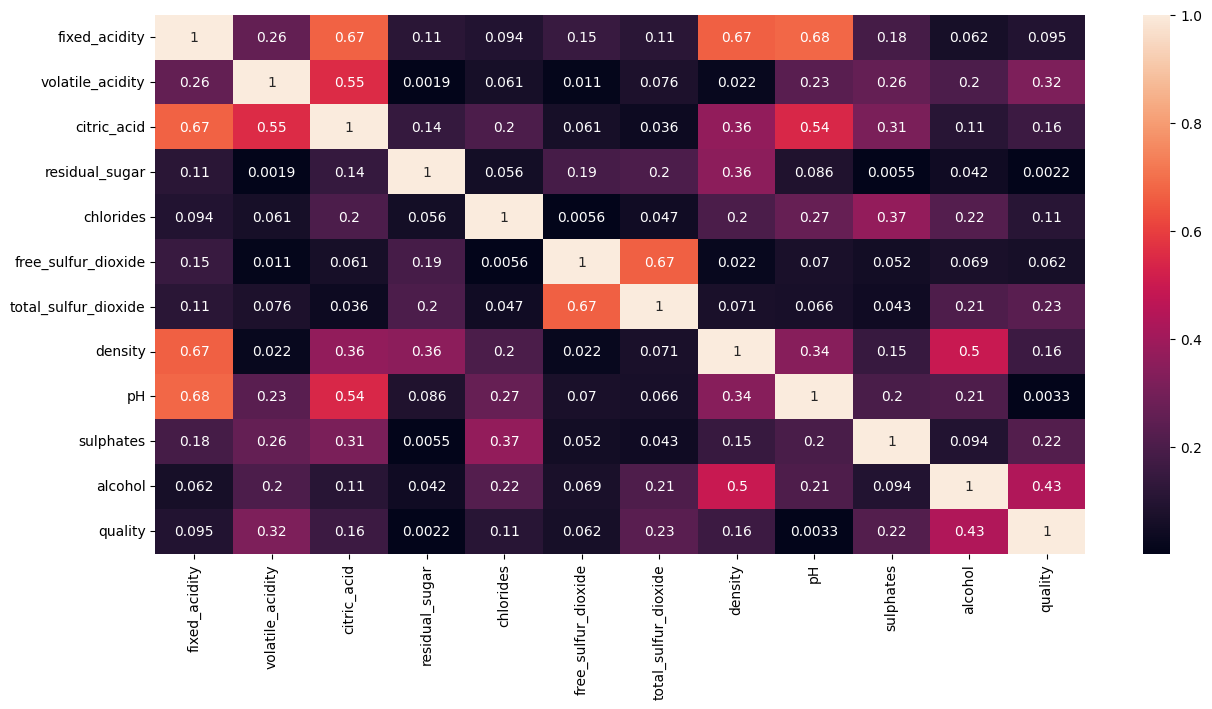

In [21]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_cl.corr().abs(), annot=True)
plt.show()

In [22]:
X = df_cl.iloc[:, :11]
y = df_cl['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=15)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Logistic regression

In [23]:
log_reg = LogisticRegression(max_iter=1000, random_state=15)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f'F1_score = {f1}')
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy = {acc}')
precision = precision_score(y_test, y_pred)
print(f'Precision = {precision}')
recall = recall_score(y_test, y_pred)
print(f'Recall = {recall}')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n{conf_matrix}')

F1_score = 0.7524366471734892
Accuracy = 0.7354166666666667
Precision = 0.7628458498023716
Recall = 0.7423076923076923

Confusion Matrix:
[[160  60]
 [ 67 193]]


In [ ]:
x_volatile_acidity = []
x_alcohol = []

for i in range(len(X_test)):
  x_volatile_acidity.append(X_test[i][1])
  x_alcohol.append(X_test[i][-1])

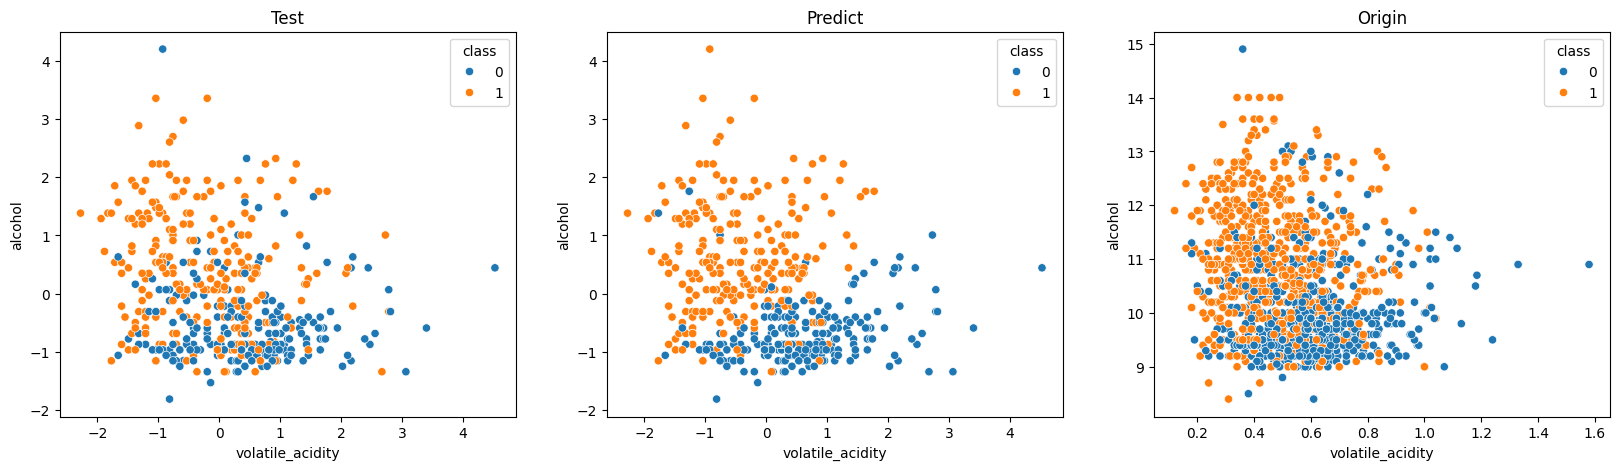

In [24]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=x_volatile_acidity, y=x_alcohol, hue=y_test)
plt.xlabel('volatile_acidity')
plt.ylabel('alcohol')
plt.legend(title='class')
plt.title('Test')

plt.subplot(1, 3, 2)
sns.scatterplot(x=x_volatile_acidity, y=x_alcohol, hue=y_pred)
plt.xlabel('volatile_acidity')
plt.ylabel('alcohol')
plt.legend(title='class')
plt.title('Predict')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df_cl['volatile_acidity'], y=df_cl['alcohol'], hue=df_cl['quality'])
plt.legend(title='class')
plt.title('Origin')

plt.show()

SVM classification (SVC)

In [25]:
from sklearn.svm import SVC

In [26]:
# SVC linear
svm_classifier_lin = SVC(kernel='linear', random_state=10)
svm_classifier_lin.fit(X_train, y_train)

y_pred = svm_classifier_lin.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f'F1_score = {f1}')
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy = {acc}')
precision = precision_score(y_test, y_pred)
print(f'Precision = {precision}')
recall = recall_score(y_test, y_pred)
print(f'Recall = {recall}')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n{conf_matrix}')

F1_score = 0.728744939271255
Accuracy = 0.7208333333333333
Precision = 0.7692307692307693
Recall = 0.6923076923076923

Confusion Matrix:
[[166  54]
 [ 80 180]]


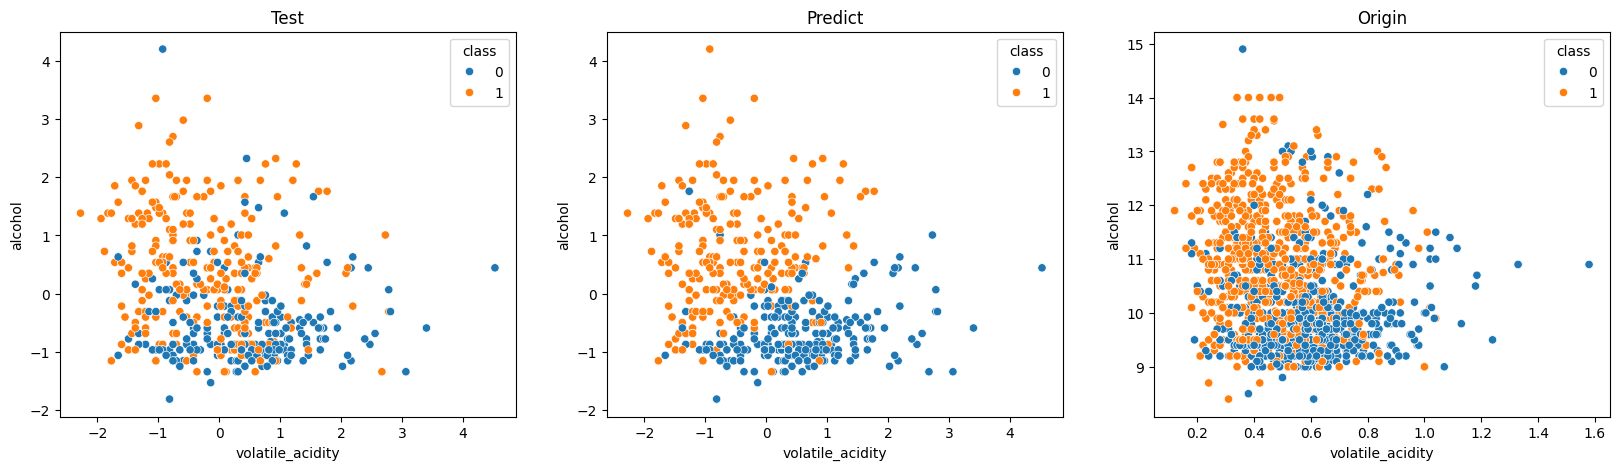

In [27]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=x_volatile_acidity, y=x_alcohol, hue=y_test)
plt.xlabel('volatile_acidity')
plt.ylabel('alcohol')
plt.legend(title='class')
plt.title('Test')

plt.subplot(1, 3, 2)
sns.scatterplot(x=x_volatile_acidity, y=x_alcohol, hue=y_pred)
plt.xlabel('volatile_acidity')
plt.ylabel('alcohol')
plt.legend(title='class')
plt.title('Predict')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df_cl['volatile_acidity'], y=df_cl['alcohol'], hue=df_cl['quality'])
plt.legend(title='class')
plt.title('Origin')

plt.show()

In [28]:
# SVC rbf
svm_classifier_rbf = SVC(kernel='rbf', random_state=10)
svm_classifier_rbf.fit(X_train, y_train)

y_pred = svm_classifier_rbf.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f'F1_score = {f1}')
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy = {acc}')
precision = precision_score(y_test, y_pred)
print(f'Precision = {precision}')
recall = recall_score(y_test, y_pred)
print(f'Recall = {recall}')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n{conf_matrix}')

F1_score = 0.7801980198019802
Accuracy = 0.76875
Precision = 0.8040816326530612
Recall = 0.7576923076923077

Confusion Matrix:
[[172  48]
 [ 63 197]]


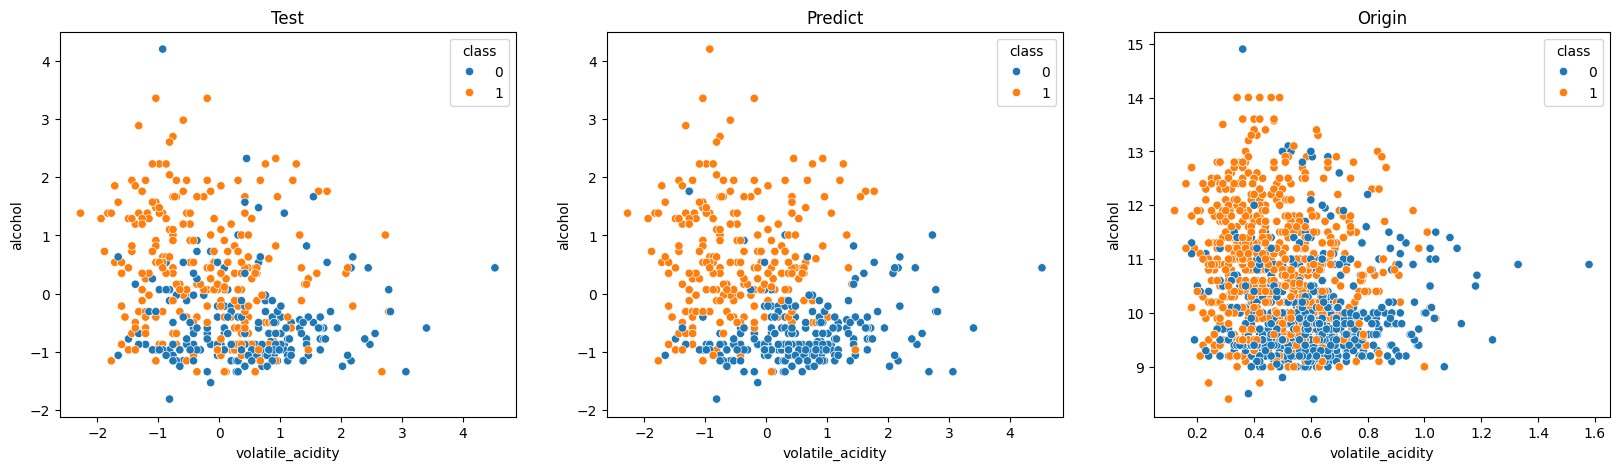

In [29]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=x_volatile_acidity, y=x_alcohol, hue=y_test)
plt.xlabel('volatile_acidity')
plt.ylabel('alcohol')
plt.legend(title='class')
plt.title('Test')

plt.subplot(1, 3, 2)
sns.scatterplot(x=x_volatile_acidity, y=x_alcohol, hue=y_pred)
plt.xlabel('volatile_acidity')
plt.ylabel('alcohol')
plt.legend(title='class')
plt.title('Predict')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df_cl['volatile_acidity'], y=df_cl['alcohol'], hue=df_cl['quality'])
plt.legend(title='class')
plt.title('Origin')

plt.show()

SVM (rbf) показал себя лучше, чем Логистическая регрессия (f1 меньше на 2%) и SVM (linear) (f1 меньше на 5%).

**Cross-validation**

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
# Logistic regression
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=3, scoring='f1')
print('Logistic regression')
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV F1-score = {cv_scores.mean()}')

# SVC linear
cv_scores = cross_val_score(svm_classifier_lin, X_train, y_train, cv=3, scoring='f1')
print('\nSVC linear')
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV F1-score = {cv_scores.mean()}')

# SVC rbf
cv_scores = cross_val_score(svm_classifier_rbf, X_train, y_train, cv=3, scoring='f1')
print('\nSVC rbf')
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV F1-score = {cv_scores.mean()}')

Logistic regression
Cross-validation scores: [0.77319588 0.77227723 0.74111675]
Mean CV F1-score = 0.7621966184268226

SVC linear
Cross-validation scores: [0.79057592 0.77078086 0.7287234 ]
Mean CV F1-score = 0.7633600589696199

SVC rbf
Cross-validation scores: [0.80620155 0.75452196 0.75318066]
Mean CV F1-score = 0.7713013919298315


Средняя оценка F1 всех 3х моделей приблизительно одинакова. Лучшая оценка у SVM (rbf).